In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import sqlite3 as db
import datetime as dt
import pandas as pd

projectDir = os.path.dirname(os.path.abspath(os.path.curdir))
dbFile = os.path.join(projectDir, 'db', '2019_nCov_data.db')

conn = db.connect(dbFile)
cu = conn.cursor()

## 介绍

接下来的数据分析基于知乎上[Snowino](https://www.zhihu.com/question/368541456/answer/991544464?utm_source=wechat_session&utm_medium=social&utm_oi=40289565671424)的回答。

在此对[Snowino](https://www.zhihu.com/question/368541456/answer/991544464?utm_source=wechat_session&utm_medium=social&utm_oi=40289565671424)的精彩分析表示感谢。

## 前言

需要回答的几个关键问题：

- 武汉／湖北／全国各大小城市**封城**以后，疫情**传播速度是否得到控制**？
- 湖北现在医疗系统**是否超负荷了**？
- 疫情接下来几天会如何发展？
- 如果我得了这个病，我有多大概率会死？

回答这些问题前，我们需要谈论数据的可信度。

Text(0.5, 0.6, '全国实时表观死亡比例 = 累计死亡数/累计确诊数')

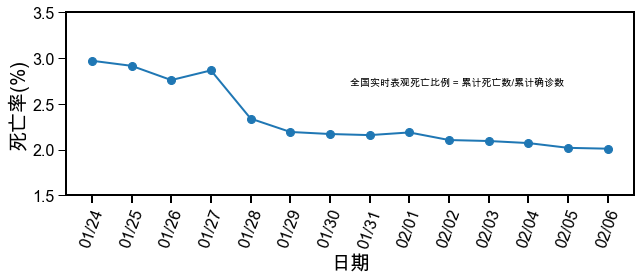

In [79]:
import matplotlib.dates as mdates

plt.rcParams['font.family'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# get overall deadth count
df = pd.read_sql_query("""select time, deadCount, confirmedCount from Overall""", conn)
df['date'] = pd.to_datetime(df['time']/1000, unit='s')
df = df.set_index('date')
dailyMean = df.resample('D').mean()

plt.figure(figsize=[9,4])
plt.plot(dailyMean.index, dailyMean['deadCount']/dailyMean['confirmedCount']*100, marker='o')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.xticks(rotation=70)

plt.xlabel('日期')
plt.ylabel(u'死亡率(%)')

plt.ylim([1.5, 3.5])

plt.text(0.5, 0.6, '全国实时表观死亡比例 = 累计死亡数/累计确诊数', transform=plt.gca().transAxes, )

网上有质疑国家统计数据的言论如下：

> 实时表观累计死亡比例一直都是2.1%，因此数据是人造的！

由上图可知，基于数据计算的死亡率并不是一个固定值，因此如上说法并不准确。我们应该相信国家统计数据的**权威性**。

**武汉/湖北/全国各大小城市封城以后，疫情传播速度是否得到控制？**



(0, 1400)

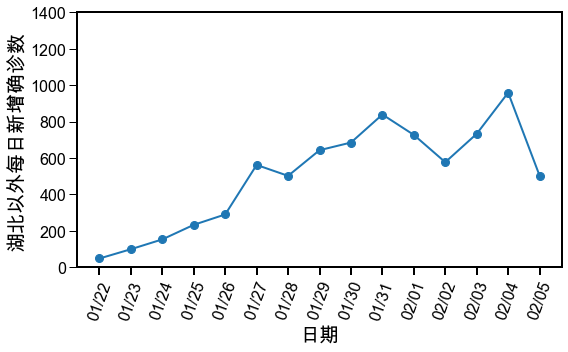

In [152]:
# get overall deadth count
OverallDf = pd.read_sql_query("""select updateTime, deadCount, confirmedCount, provinceName from Region_Data where provinceName!='湖北省' and provinceName!='待明确地区'""", conn)
OverallDf['date'] = pd.to_datetime(OverallDf['updateTime'].apply(int)/1000, unit='s')
OverallDf = OverallDf.set_index('date')
OverallDf = OverallDf.groupby('provinceName')
dailyMeanOverall = OverallDf.resample('D').mean().round().groupby('date')
totalConfirmedCount = dailyMeanOverall['confirmedCount'].agg(np.sum)[:-1]

plt.figure(figsize=[8, 5])
plt.plot(totalConfirmedCount.index[1:], np.diff(totalConfirmedCount), marker='o')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.xticks(rotation=70)

plt.xlabel('日期')
plt.ylabel('湖北以外每日新增确诊数')

plt.ylim([0, 1400])

(0, 4000)

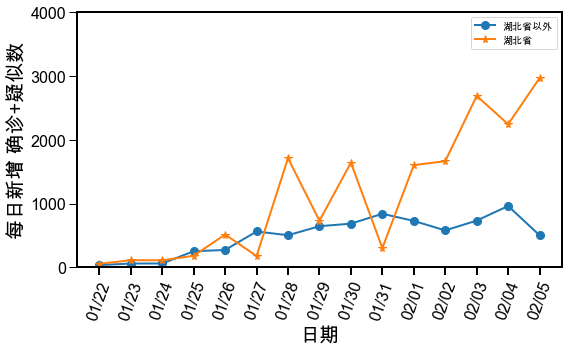

In [160]:
# get data
OverallDf = pd.read_sql_query("""select updateTime, suspectedCount+confirmedCount as totalCount, provinceName from Region_Data where provinceName!='湖北省' and provinceName != '待明确地区'""", conn)
OverallDf['date'] = pd.to_datetime(OverallDf['updateTime'].apply(int)/1000, unit='s')
OverallDf = OverallDf.set_index('date')
OverallDf = OverallDf.groupby('provinceName')
dailyMeanOverall = OverallDf.resample('D').mean().round().groupby('date')
totalCount = (dailyMeanOverall['totalCount']).agg(np.sum)[:-1]

HubeiDf = pd.read_sql_query("""select updateTime, suspectedCount+confirmedCount as totalCount, provinceName from Region_Data where provinceName='湖北省'""", conn)
HubeiDf['date'] = pd.to_datetime(HubeiDf['updateTime'].apply(int)/1000, unit='s')
HubeiDf = HubeiDf.set_index('date')
HubeiDf = HubeiDf.groupby('provinceName')
dailyMeanHubei = HubeiDf.resample('D').mean().round().groupby('date')
HubeitotalCount = (dailyMeanHubei['totalCount']).agg(np.sum)[:]

plt.figure(figsize=[8, 5])
plt.plot(totalCount.index[1:], np.diff(totalCount), marker='o', label='湖北省以外')
plt.plot(HubeitotalCount.index[1:], np.diff(HubeitotalCount), marker='*', label='湖北省')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.xticks(rotation=70)

plt.xlabel('日期')
plt.ylabel('每日新增 确诊+疑似数')

plt.legend()

plt.ylim([0, 4000])